# Tarea 7: Non Linear Conjugate Gradient methods
## Oscar Esaú Peralta Rosales 
### Maestría en computación - CIMAT

Implement the following Non Linear Conjugate Gradient methods: Fletcher-Reeves (FR), Fletcher-Reeves Polak-Ribiere (FRPR) and Hestenes-Stiefel
(HF). Apply the previous implementations to the following functions and
compare the results with respect to: number of iterations, norm of the
gradient $||\nabla f(x_k) ||$ and the error $|f(x_k) - f(x^*)|$. Use two initial points: the initial point provided below and another randomly selected.

- Rosembrock function, for n = 100

$$
    f(x) = \sum_{i=1}^{n-1} [100 (x_{i+1} - x_i^2)^2 + (1 - x_i)^2]
$$

$$
x^0 = [-1.2, 1,1,..., 1, -1.2, 1]^T
$$

$$
x^* = [1,1,...,1,1]^T
$$

$$
f(x^*) = 0
$$

- Wood function

$$ 
f(x) = 100(x^2_1 − x_2 )^2 + (x_1 − 1)^2 + (x_3 − 1)^2 + 90(x^2_3 − x_4 )^2 + 10.1[(x_2 − 1)^2 + (x_4 − 1)^2 ] + 19.8(x_2 − 1)(x_4 − 1)
$$

$$
x^0 = [-3, -1, -3, -1]^T
$$

$$
x^* = [1,1,1,1]^T
$$

$$
f(x^*) = 0
$$

In [0]:
import time

from typing import Callable, Dict, Tuple
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt

import rosembrock
import wood

## Non Linear Conjugate Gradiente

In [0]:
class GC():
    VARIANT = namedtuple('VARIANT', 'FR FRPR HS')(0,1,2)

    def __init__(self):
        self.__clear()


    def __clear(self):
        self.x_log = []
        self.f_log = []
        self.g_norm_log = []
        self.x_best = None
        self.iters = 0


    def __get_alpha_by_backtracking(self, f, x_k, g_k, d_k, alpha, ro, c):
        while f(x_k + alpha * d_k) > f(x_k) + c * alpha * g_k.dot(d_k):
            alpha = ro * alpha
        return alpha


    def __get_beta(self, g_kn, g_k, d_k, variant):
        if variant is None or variant == self.VARIANT.FR:
            beta_FR = g_kn.dot(g_kn) / g_k.dot(g_k)
            return beta_FR

        if variant == self.VARIANT.FRPR:
            beta_PR = g_kn.dot(g_kn - g_k) / g_k.dot(g_k)
            if self.iters <= 2:
                return beta_PR

            beta_FR = g_kn.dot(g_kn) / g_k.dot(g_k)
            if beta_PR < -beta_FR:
                return -beta_FR
            if abs(beta_PR) <= beta_FR:
                return beta_PR
            if beta_PR > beta_FR:
                return beta_FR

        beta_HS = g_kn.dot(g_kn - g_k) / (g_kn - g_k).dot(d_k)
        return beta_HS
    

    def optimize(self,
                 X: np.array,
                 f: Callable[[np.array], np.array],
                 g: Callable[[np.array], np.array],
                 H: Callable[[np.array], np.array],
                 tol_g: float=1e-12,
                 mxitr: int=1000,
                 variant=None,
                 **kwargs):
        self.__clear()

        x_k = X
        g_k = g(x_k, **kwargs.get('g_kwargs', {}))
        d_k = -g_k

        self.x_log.append(x_k)
        self.g_norm_log.append(np.linalg.norm(g_k))
        self.f_log.append(f(x_k, **kwargs.get('f_kwargs', {})))
        
        alpha = kwargs['alpha']
        while self.g_norm_log[-1] > tol_g and self.iters < mxitr:
            q_k = H(x_k, **kwargs.get('H_kwargs', {})).dot(d_k)

            # alpha_k = -g_k.dot(d_k) / ( d_k.dot(q_k) )
            alpha_k = self.__get_alpha_by_backtracking(f, x_k, g_k, d_k, alpha, kwargs['ro'], kwargs['c1'])
            
            x_k = x_k + alpha_k * d_k

            g_kn = g(x_k, **kwargs.get('g_kwargs', {}))
            
            beta_kn = self.__get_beta(g_kn, g_k, d_k, variant)
            
            d_k = - g_kn + beta_kn * d_k

            g_k = g_kn

            self.x_log.append(x_k)
            self.g_norm_log.append(np.linalg.norm(g_k))
            self.f_log.append(f(x_k, **kwargs.get('f_kwargs', {})))

            self.iters +=1

        self.x_best = x_k


In [110]:
gc = GC()
gc.x_log

[]

iters: 267
g norm 6.3767504887380730825e-09
f error 3.9866238543009337462


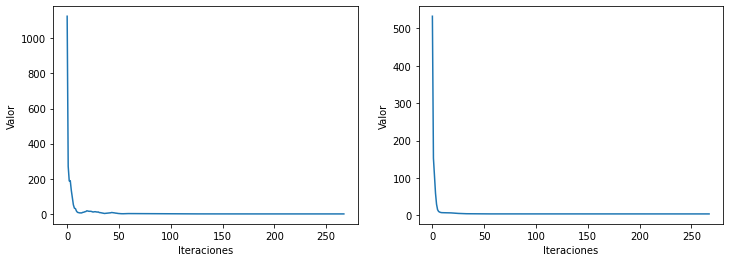

array([-0.9932861 ,  0.99665107,  0.99833032,  0.99916774,  0.9995852 ,
        0.99979328,  0.99989698,  0.99994866,  0.99997441,  0.99998725,
        0.99999365,  0.99999683,  0.99999842,  0.99999921,  0.99999961,
        0.9999998 ,  0.9999999 ,  0.99999995,  0.99999998,  0.99999999,
        0.99999999,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.  

In [163]:
X = np.ones(100, dtype=np.float128)
X[0] = X[-2] = -1.2

# X = np.ones(100, dtype=np.float128)
# X[4] = X[40] = 0.5

xop = np.ones(100)

params = {
    'X': X,
    'f': rosembrock.function,
    'g': rosembrock.gradient,
    'H': rosembrock.hessian,
    'tol_g': 1e-8,
    'mxitr': 10000,
    'variant': gc.VARIANT.HS,
    'alpha': 0.01,
    'c1': 0.40,
    'ro': 0.8,
}

gc.optimize(**params)

print("iters: %d" % gc.iters)
print("g norm", np.linalg.norm(gc.g_norm_log[-1]))
print("f error", gc.f_log[-1] - rosembrock.function(xop))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(gc.g_norm_log)
ax1.set(xlabel='Iteraciones', ylabel='Valor')
ax2.plot(gc.f_log)
ax2.set(xlabel='Iteraciones', ylabel='Valor')
plt.show()

gc.x_best

iters: 251
g norm 1.0430287364424788e-09
f error 1.3861777782216782168e-19


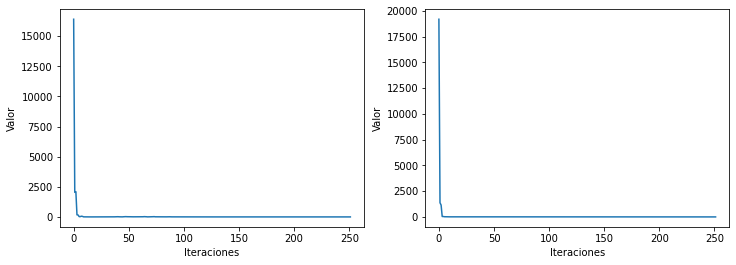

array([1., 1., 1., 1.], dtype=float128)

In [166]:
X = np.array([-3, -1, -3, -1], dtype=np.float128)

# X = np.array([0.7, 0.5, 0.1, 0.8], dtype=np.float128)

xop = np.ones(4)

params = {
    'X': X,
    'f': wood.function,
    'g': wood.gradient,
    'H': wood.hessian,
    # 'tol_x': 1e-12,
    # 'tol_f': 1e-12,
    'tol_g': 1e-8,
    'mxitr': 100000,
    'variant': gc.VARIANT.HS,
    'alpha': 0.01,
    'c1':0.40,
    'ro':0.8,
}

gc.optimize(**params)

print("iters: %d" % gc.iters)
print("g norm", np.linalg.norm(gc.g_norm_log[-1]))
print("f error", gc.f_log[-1] - wood.function(xop))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(gc.g_norm_log)
ax1.set(xlabel='Iteraciones', ylabel='Valor')
ax2.plot(gc.f_log)
ax2.set(xlabel='Iteraciones', ylabel='Valor')
plt.show()

gc.x_best